# Lista Redes Neurais

In [30]:
# Lista de Imports
import os
import torch
import numpy as np
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from torch.utils.data import TensorDataset, DataLoader
from sklearn.datasets import make_classification, make_moons

# Define uma seed 
np.random.seed(42)
torch.manual_seed(42)

# Define o diretório imagens se não existir
os.makedirs("imagens", exist_ok=True)

# Questão 1: Regressão Linear. 
Implemente um modelo de regressão linear. Para isso, utilize um conjunto de dados sintético gerado com a equação:
<p align="center">
y = 3x + 5 + ε(1)
</p>
onde x segue distribuição uniforme entre -10 e 10 e ε ́e um ruído gaussiano com média zero e desvio padrão de 2.

Faça os seguintes passos:

1. Gere um conjunto de dados com pelo menos 100 pontos.
2. Divida os dados em treino (80%) e teste (20%).
3. Implemente modelos de regressão linear empregando:
    - a solução de mínimos quadrados (pseudo-inversa);
    - uma rede neural com uma camada treinada via gradiente descendente utilizando MSE-Loss (Erro Quadrático Médio) e otimizador SGD.
4. Apresente as soluções para cada um dos métodos acima.
5. Avalie o desempenho dos modelos e visualize os resultados.

### Primeiro passo
Gere um conjunto de dados com pelo menos 100 pontos.

In [31]:
N = 100
x = np.random.uniform(-10, 10, N)  # Distribuição uniforme entre -10 e 10
epsilon = np.random.normal(0, 2, N)  # Ruído gaussiano com média 0 e desvio 2
y = 3 * x + 5 + epsilon  # Equação dada

# Convertendo para arrays 2D para regressão
X = np.vstack((np.ones(N), x)).T  # Adicionando termo de viés

### Segundo passo
Divida os dados em treino (80%) e teste (20%).

In [32]:
train_size = int(0.8 * N)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

### Terceiro passo
Implemente modelos de regressão linear empregando:

- A solução de mínimos quadrados (pseudo-inversa)

In [33]:
theta = np.linalg.inv(X_train.T @ X_train) @ X_train.T @ y_train

# Previsões no conjunto de teste
y_pred_pinv = X_test @ theta

- Uma rede neural com uma camada treinada via gradiente descendente utilizando MSE-Loss (Erro Quadrático Médio) e otimizador SGD.

In [34]:
# Implementação com Rede Neural
class LinearRegressionNN(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(1, 1)  # Apenas uma camada linear

    def forward(self, x):
        return self.linear(x)

In [35]:
# Convertendo os dados para Tensores do PyTorch 
X_train_torch = torch.tensor(X_train[:, 1], dtype=torch.float32).view(-1, 1)
y_train_torch = torch.tensor(y_train, dtype=torch.float32).view(-1, 1)
X_test_torch = torch.tensor(X_test[:, 1], dtype=torch.float32).view(-1, 1)



In [36]:
# Criando o modelo, função de perda e otimizador
model = LinearRegressionNN()
criterion = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)

# Treinamento da Rede Neural
epochs = 1000
for epoch in range(epochs):
    optimizer.zero_grad()
    y_pred = model(X_train_torch)
    loss = criterion(y_pred, y_train_torch)
    loss.backward()
    optimizer.step()

# Obtendo os coeficientes treinados
w_nn, b_nn = model.linear.weight.item(), model.linear.bias.item()

# Predições da Rede Neural
y_pred_nn = model(X_test_torch).detach().numpy()

### Quarto passo

Apresente as soluções para cada um dos métodos acima.

In [37]:

print("Coeficientes da regressão MSE:", theta)
print("Coeficientes da Rede Neural: w =", w_nn, ", b =", b_nn)

print("Resultado original", y_test)
print("Predições da MSE", y_pred_pinv)
print("Predições da Rede Neural", y_pred_nn.squeeze())


Coeficientes da regressão MSE: [4.8363477  2.93680725]
Coeficientes da Rede Neural: w = 2.9368069171905518 , b = 4.8363356590271
Resultado original [ 30.51775457  13.34555345  -7.5287255  -19.87339177  -8.29042404
  -3.91483147  21.09356186  11.61208364  30.15951681   4.15845736
 -16.18022492  21.5882732   20.15632669   7.16915953  19.47900194
   2.99611521   6.20976634   1.33476505 -22.9214708  -16.87214788]
Predições da MSE [ 26.16364314  12.07840434  -5.09605042 -20.79855229  -6.26582205
  -5.43171004  18.32252946  12.91594327  27.57973146   3.20435951
 -17.50721981  17.36152442  20.15385611   8.43553405  20.75191525
   4.47192494   6.17158646   0.58038645 -23.03870326 -18.19459828]
Predições da Rede Neural [ 26.16363    12.078392   -5.096061  -20.798561   -6.2658324  -5.431721
  18.322515   12.91593    27.579718    3.2043476 -17.507229   17.361511
  20.153843    8.435522   20.751902    4.471913    6.1715746   0.5803747
 -23.038712  -18.194609 ]


### Quinto passo
Avalie o desempenho dos modelos e visualize os resultados.

MSE (Pseudo-Inversa): 3.9022
MSE (Rede Neural): 3.9022


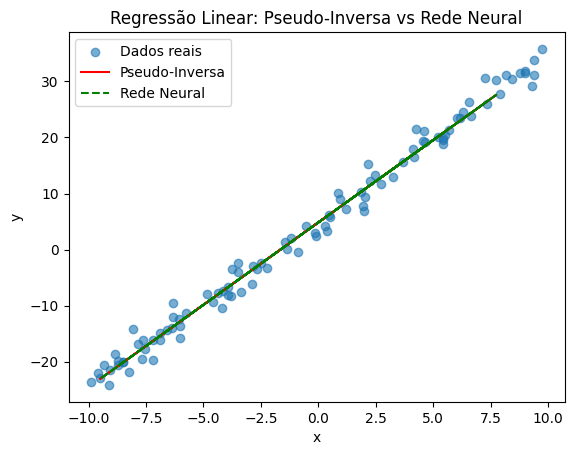

In [38]:
# Cálculo dos Erros Médios Quadráticos (MSE)
mse_pinv = mean_squared_error(y_test, y_pred_pinv)
mse_nn = mean_squared_error(y_test, y_pred_nn)

print(f"MSE (Pseudo-Inversa): {mse_pinv:.4f}")
print(f"MSE (Rede Neural): {mse_nn:.4f}")

plt.scatter(x, y, label="Dados reais", alpha=0.6)
plt.plot(x[train_size:], y_pred_pinv, label="Pseudo-Inversa", color="red")
plt.plot(x[train_size:], y_pred_nn, label="Rede Neural", color="green", linestyle="dashed")
plt.legend()
plt.xlabel("x")
plt.ylabel("y")
plt.title("Regressão Linear: Pseudo-Inversa vs Rede Neural")
plt.savefig("imagens/Q1-regressao_linear.png")
plt.show()


# Questão 2 - Regressão Logística para Classificação Binária. 
Implemente um modelo de regressão logística para resolver um problema de classificação binária utilizando um conjunto de dados sintético.

Faça os seguintes passos:
1. Utilize a função make classification da biblioteca Scikit-Learn para gerar um conjunto de dados com 500 amostras, 2 variáveis preditoras e 2 classes.
2. Divida os dados em treino (70%) e teste (30%).
3. Implemente um modelo de regressão logística (i.e., rede neural com uma  ́unica camada de saída e ativação sigmoid).
4. Treine o modelo utilizando gradiente descendente (versão não-estocástica) (conforme visto em sala).
5. Avalie a acurácia no conjunto de teste e visualize a fronteira de decisão do classificador.

### Primeiro passo
Utilize a função make classification da biblioteca Scikit-Learn para gerar um conjunto de dados com 500 amostras, 2 variáveis preditoras e 2 classes.


In [39]:
X, y = make_classification(n_samples=500, n_features=2, n_classes=2, n_redundant=0, random_state=42)
# X, y

### Segundo passo
Divida os dados em treino (70%) e teste (30%).


In [40]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


### Terceiro passo
Implemente um modelo de regressão logística (i.e., rede neural com uma  ́unica camada de saída e ativação sigmoid).


In [41]:
class LogisticRegressionGD:
    def __init__(self, learning_rate=0.01, epochs=1000):
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.theta = None

    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))

    def fit(self, X, y):
        # Adicionando um termo de viés (coluna de 1s)
        X = np.c_[np.ones(X.shape[0]), X]
        self.theta = np.zeros(X.shape[1])

        # Treinamento via Gradiente Descendente Batch
        for _ in range(self.epochs):
            z = X @ self.theta
            h = self.sigmoid(z)
            gradient = (1 / len(y)) * X.T @ (h - y)
            self.theta -= self.learning_rate * gradient

    def predict(self, X):
        X = np.c_[np.ones(X.shape[0]), X]  
        return (self.sigmoid(X @ self.theta) >= 0.5).astype(int)

### Quarto passo
Treine o modelo utilizando gradiente descendente (versão não-estocástica) (conforme visto em sala).


In [42]:
# Criando e treinando o modelo
model = LogisticRegressionGD(learning_rate=0.1, epochs=1000)
model.fit(X_train, y_train)

### Quinto passo
Avalie a acurácia no conjunto de teste e visualize a fronteira de decisão do classificador.


Acurácia no conjunto de teste: 0.8733


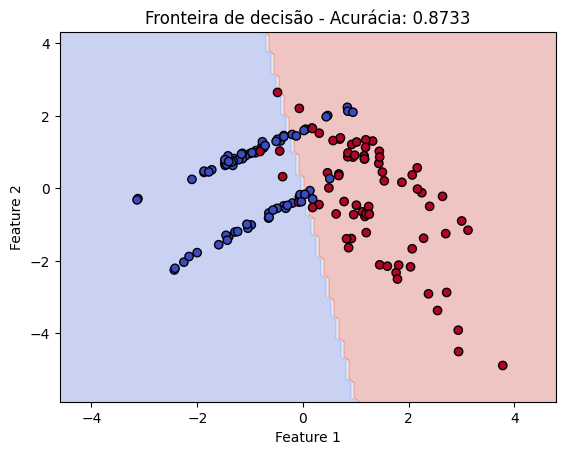

In [43]:
# Avaliando a acurácia no conjunto de teste
y_pred = model.predict(X_test)
accuracy = np.mean(y_pred == y_test)
print(f"Acurácia no conjunto de teste: {accuracy:.4f}")

# Fronteira de decisão
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.3, cmap="coolwarm")
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap="coolwarm", edgecolors="k")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title(f"Fronteira de decisão - Acurácia: {accuracy:.4f}")
plt.savefig("imagens/Q2-fronteira_decisao_logistica.png")
plt.show()

# Questão 3 - Classificação Binária com uma MLP e Seleçã de Neurônios.
Implemente uma rede neural do tipo MLP para a tarefa de classificação binária. Nesta questão, você deve usar um conjunto de validação para selecionar o número adequado de neurônios na camada oculta.

Faça os seguintes passos:
1. Utilize a função make moons da biblioteca Scikit-Learn para gerar um conjunto de dados com 500 amostras.
2. Divida os dados em treino (70%), validação (15%) e teste (15%).
3. Implemente uma MLP com:
    - Uma camada oculta com n neurônios e ativação ReLU.
    - Uma camada de saída com 1 neurônio e ativação sigmoid.
    - Utilize a função de perda BCELoss e o otimizador Adam ou SGD.
4. Treine modelos com diferentes números de neurônios na camada oculta (exemplo: 5, 10, 20, 50).
5. Plote a evolução da função custo (loss) ao longo do treinamento (épocas).
6. Escolha o melhor número de neurônios com base na menor perda no conjunto de validação.
7. Avalie o modelo escolhido no conjunto de teste e visualize a fronteira de decisão.

### Primeiro passo
Utilize a função make moons da biblioteca Scikit-Learn para gerar um conjunto de dados com 500 amostras.

In [44]:
X, y = make_moons(n_samples=500, noise=0.2, random_state=42)


### Segundo passo
Divida os dados em treino (70%), validação (15%) e teste (15%).

In [45]:
# Dividindo os dados (70% treino, 15% validação, 15% teste)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Convertendo para tensores PyTorch
X_train, y_train = torch.tensor(X_train, dtype=torch.float32), torch.tensor(y_train, dtype=torch.float32).unsqueeze(1)
X_val, y_val = torch.tensor(X_val, dtype=torch.float32), torch.tensor(y_val, dtype=torch.float32).unsqueeze(1)
X_test, y_test = torch.tensor(X_test, dtype=torch.float32), torch.tensor(y_test, dtype=torch.float32).unsqueeze(1)

# Criando DataLoaders
train_loader = DataLoader(TensorDataset(X_train, y_train), batch_size=32, shuffle=True)
val_loader = DataLoader(TensorDataset(X_val, y_val), batch_size=32, shuffle=False)
test_loader = DataLoader(TensorDataset(X_test, y_test), batch_size=32, shuffle=False)


### Terceiro passo
Implemente uma MLP com:
- Uma camada oculta com n neurônios e ativação ReLU.
- Uma camada de saída com 1 neurônio e ativação sigmoid.
- Utilize a função de perda BCELoss e o otimizador Adam ou SGD.

In [46]:
# MLP
class MLP(nn.Module):
    def __init__(self, n_hidden):
        super(MLP, self).__init__()
        self.hidden = nn.Linear(2, n_hidden)  
        self.output = nn.Linear(n_hidden, 1)  

    def forward(self, x):
        x = torch.relu(self.hidden(x))  # Ativação ReLU
        x = torch.sigmoid(self.output(x))  # Ativação Sigmoid
        return x

### Quarto passo e Quinto passo
Treine modelos com diferentes números de neurônios na camada oculta (exemplo: 5, 10, 20, 50).

Plote a evolução da função custo (loss) ao longo do treinamento (épocas).


In [ ]:
# Função para treinar o modelo
def train_model(n_hidden, epochs=100, lr=0.01):
    model = MLP(n_hidden)
    criterion = nn.BCELoss()
    optimizer = optim.Adam(model.parameters(), lr=lr)

    train_losses, val_losses = [], []

    for epoch in range(epochs):
        model.train()
        train_loss = 0
        for X_batch, y_batch in train_loader:
            optimizer.zero_grad()
            y_pred = model(X_batch)
            loss = criterion(y_pred, y_batch)
            loss.backward()
            optimizer.step()
            train_loss += loss.item()
        train_loss /= len(train_loader)
        train_losses.append(train_loss)

        # Avaliação no conjunto de validação
        model.eval()
        with torch.no_grad():
            val_loss = sum(criterion(model(X_v), y_v).item() for X_v, y_v in val_loader) / len(val_loader)
        val_losses.append(val_loss)
        print("Epoch", epoch+1, "/", epochs)
    return model, train_losses, val_losses

Epoch 0 / 100
Epoch 1 / 100
Epoch 2 / 100
Epoch 3 / 100
Epoch 4 / 100
Epoch 5 / 100
Epoch 6 / 100
Epoch 7 / 100
Epoch 8 / 100
Epoch 9 / 100
Epoch 10 / 100
Epoch 11 / 100
Epoch 12 / 100
Epoch 13 / 100
Epoch 14 / 100
Epoch 15 / 100
Epoch 16 / 100
Epoch 17 / 100
Epoch 18 / 100
Epoch 19 / 100
Epoch 20 / 100
Epoch 21 / 100
Epoch 22 / 100
Epoch 23 / 100
Epoch 24 / 100
Epoch 25 / 100
Epoch 26 / 100
Epoch 27 / 100
Epoch 28 / 100
Epoch 29 / 100
Epoch 30 / 100
Epoch 31 / 100
Epoch 32 / 100
Epoch 33 / 100
Epoch 34 / 100
Epoch 35 / 100
Epoch 36 / 100
Epoch 37 / 100
Epoch 38 / 100
Epoch 39 / 100
Epoch 40 / 100
Epoch 41 / 100
Epoch 42 / 100
Epoch 43 / 100
Epoch 44 / 100
Epoch 45 / 100
Epoch 46 / 100
Epoch 47 / 100
Epoch 48 / 100
Epoch 49 / 100
Epoch 50 / 100
Epoch 51 / 100
Epoch 52 / 100
Epoch 53 / 100
Epoch 54 / 100
Epoch 55 / 100
Epoch 56 / 100
Epoch 57 / 100
Epoch 58 / 100
Epoch 59 / 100
Epoch 60 / 100
Epoch 61 / 100
Epoch 62 / 100
Epoch 63 / 100
Epoch 64 / 100
Epoch 65 / 100
Epoch 66 / 100
Epoch

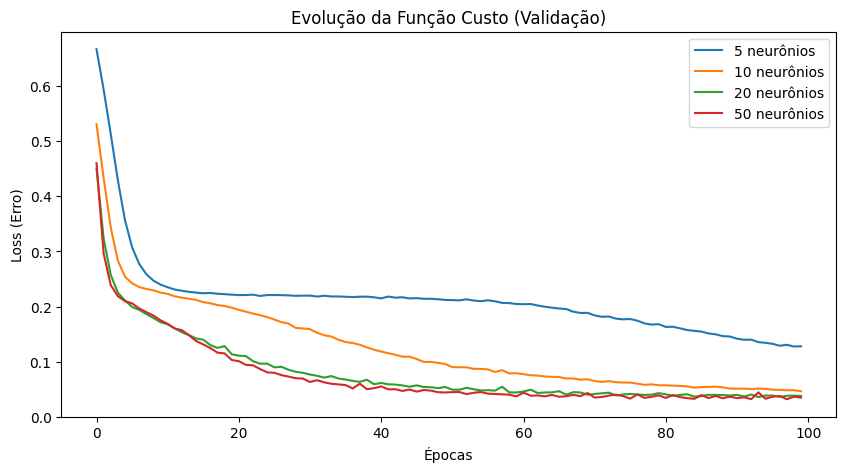

In [48]:
# Testando diferentes números de neurônios na camada oculta
neurons_list = [5, 10, 20, 50]
best_model = None
best_val_loss = float('inf')
best_n = None

plt.figure(figsize=(10, 5))
for n in neurons_list:
    model, train_losses, val_losses = train_model(n_hidden=n)

    # Salvando o melhor modelo
    if val_losses[-1] < best_val_loss:
        best_val_loss = val_losses[-1]
        best_model = model
        best_n = n

    plt.plot(val_losses, label=f"{n} neurônios")

plt.xlabel("Épocas")
plt.ylabel("Loss (Erro)")
plt.legend()
plt.title("Evolução da Função Custo (Validação)")
plt.savefig("imagens/q3-evolucao_perda.png")
plt.show()

### Sexto passo

Escolha o melhor número de neurônios com base na menor perda no conjunto de validação.

In [49]:
print(f"Melhor número de neurônios: {best_n} (Menor Loss: {best_val_loss:.4f})")


Melhor número de neurônios: 50 (Menor Loss: 0.0345)


### Sétimo passo
Avalie o modelo escolhido no conjunto de teste e visualize a fronteira de decisão.

Acurácia no conjunto de teste: 0.9867


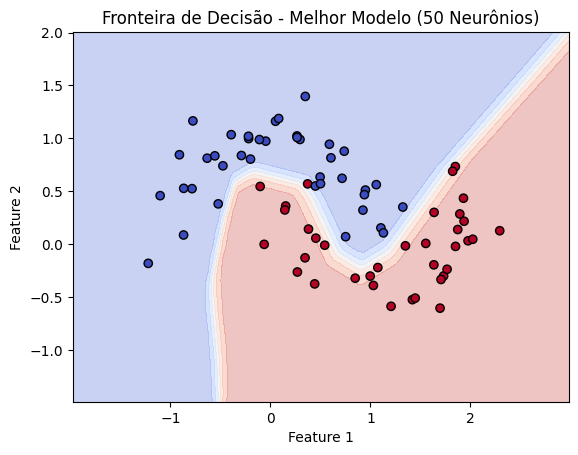

In [50]:
# Avaliação no conjunto de teste
best_model.eval()
with torch.no_grad():
    y_pred = (best_model(X_test) >= 0.5).float()
accuracy = (y_pred.eq(y_test).sum() / len(y_test)).item()
print(f"Acurácia no conjunto de teste: {accuracy:.4f}")

x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))
X_grid = torch.tensor(np.c_[xx.ravel(), yy.ravel()], dtype=torch.float32)

with torch.no_grad():
    Z = best_model(X_grid).numpy().reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.3, cmap="coolwarm")
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test.numpy().flatten(), cmap="coolwarm", edgecolors="k")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title(f"Fronteira de Decisão - Melhor Modelo ({best_n} Neurônios)")
plt.savefig("imagens/q3-fronteira_decisao_mlp.png")
plt.show()